In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
import tensorflow_probability as tfp
import time  
import sim
import compare

DTYPE = 'float32'

# define parameters for L63 system
dim = 4
sigma = 0.1

# define parameters for simlulation
n_particles = int(1e6)
n_subdivisions = 30
save_folder = '../data'
n_steps = 50
n_repeats = 10
dt = 0.1
r = 1.0

def mu_tf(X):
    x, y, x1, y1 = tf.split(X, dim, axis=-1)
    z = 4. * (x*x + y*y - 1.0)
    z1 = 4. * (x1*x1 + y1*y1 - 1.0)
    return tf.concat([-x*z, -y*z, -x1*z1, -y1*z1], axis=-1) 

mu_np = lambda X: mu_tf(X).numpy()

C:\Users\pinak\Documents\GitHub\sphere-fp


In [2]:
dim = 2
net = arch.LSTMForgetNet(50, 3, tf.float32, name="sphere{}D".format(dim))
net.load_weights('../data/2D-true-vs-learned/{}_100'.format(net.name)).expect_partial()
X = tf.random.uniform(shape=(10, dim))
net(*tf.split(X, dim, axis=-1))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.03112149],
       [-0.28572014],
       [-0.01726424],
       [-0.00280342],
       [-0.10824778],
       [-0.10013168],
       [-0.00832974],
       [-0.06086722],
       [-0.06960161],
       [-0.28747573]], dtype=float32)>

In [3]:
from scipy.special import erf
import numpy as np

D = 1.0
def p_inf(x, y):
  Z = 0.5 * np.sqrt(np.pi**3 * D) * (1. + erf(1/np.sqrt(D)))
  return tf.exp(-(x**2 + y**2 - 1.)**2 / D) / Z

step = 10000, diff = 0.025953665375709534, Z_mc = 10.476233124732971
step = 10100, diff = 0.025777548551559448, Z_mc = 10.477680444717407
step = 10200, diff = 0.025754839181900024, Z_mc = 10.48375940322876
step = 10300, diff = 0.025662481784820557, Z_mc = 10.484939575195312
step = 10400, diff = 0.02576632797718048, Z_mc = 10.504804015159607
step = 10500, diff = 0.025625288486480713, Z_mc = 10.493603110313416
step = 10600, diff = 0.025491446256637573, Z_mc = 10.498256206512451
step = 10700, diff = 0.025287598371505737, Z_mc = 10.490394115447998
step = 10800, diff = 0.025290459394454956, Z_mc = 10.498309850692749
step = 10900, diff = 0.025203794240951538, Z_mc = 10.504438161849976
step = 11000, diff = 0.0250769704580307, Z_mc = 10.50204885005951
step = 11100, diff = 0.02500610053539276, Z_mc = 10.505921959877014
step = 11200, diff = 0.024894341826438904, Z_mc = 10.505629062652588
step = 11300, diff = 0.025029852986335754, Z_mc = 10.5213543176651
step = 11400, diff = 0.024802416563034058,

step = 22000, diff = 0.013418048620223999, Z_mc = 10.689404368400574
step = 22100, diff = 0.013271301984786987, Z_mc = 10.687076210975647
step = 22200, diff = 0.013374865055084229, Z_mc = 10.686227560043335
step = 22300, diff = 0.013067975640296936, Z_mc = 10.691731452941895
step = 22400, diff = 0.012950971722602844, Z_mc = 10.684206247329712
step = 22500, diff = 0.012905582785606384, Z_mc = 10.692785024642944
step = 22600, diff = 0.012887999415397644, Z_mc = 10.684928297996521
step = 22700, diff = 0.01291947066783905, Z_mc = 10.694283843040466
step = 22800, diff = 0.012949615716934204, Z_mc = 10.695722579956055
step = 22900, diff = 0.012720108032226562, Z_mc = 10.692131638526917
step = 23000, diff = 0.012903079390525818, Z_mc = 10.69673216342926
step = 23100, diff = 0.012813687324523926, Z_mc = 10.69142997264862
step = 23200, diff = 0.012881070375442505, Z_mc = 10.699743747711182
step = 23300, diff = 0.012914657592773438, Z_mc = 10.706512570381165
step = 23400, diff = 0.01280157268047

step = 34000, diff = 0.00940297544002533, Z_mc = 10.827250599861145
step = 34100, diff = 0.009368941187858582, Z_mc = 10.827248454093933
step = 34200, diff = 0.009386703372001648, Z_mc = 10.820035457611084
step = 34300, diff = 0.009334251284599304, Z_mc = 10.819696426391602
step = 34400, diff = 0.009270802140235901, Z_mc = 10.822328209877014
step = 34500, diff = 0.009103581309318542, Z_mc = 10.813960790634155
step = 34600, diff = 0.00910237431526184, Z_mc = 10.816121578216553
step = 34700, diff = 0.009164407849311829, Z_mc = 10.831322193145752
step = 34800, diff = 0.008980169892311096, Z_mc = 10.826675534248352
step = 34900, diff = 0.009188681840896606, Z_mc = 10.831025004386902
step = 35000, diff = 0.0090179443359375, Z_mc = 10.83401083946228
step = 35100, diff = 0.008907198905944824, Z_mc = 10.83381986618042
step = 35200, diff = 0.009038865566253662, Z_mc = 10.8341224193573
step = 35300, diff = 0.009131953120231628, Z_mc = 10.834214687347412
step = 35400, diff = 0.008977100253105164,

step = 46000, diff = 0.00749756395816803, Z_mc = 10.958849430084229
step = 46100, diff = 0.0076865702867507935, Z_mc = 10.959408402442932
step = 46200, diff = 0.007494896650314331, Z_mc = 10.96280837059021
step = 46300, diff = 0.007652014493942261, Z_mc = 10.96048128604889
step = 46400, diff = 0.007570162415504456, Z_mc = 10.967569828033447
step = 46500, diff = 0.007535099983215332, Z_mc = 10.960221648216248
step = 46600, diff = 0.007410779595375061, Z_mc = 10.96488332748413
step = 46700, diff = 0.0073661357164382935, Z_mc = 10.954289674758911
step = 46800, diff = 0.007285460829734802, Z_mc = 10.971206903457642
step = 46900, diff = 0.007252335548400879, Z_mc = 10.968702793121338
step = 47000, diff = 0.007309332489967346, Z_mc = 10.965623617172241
step = 47100, diff = 0.007454827427864075, Z_mc = 10.971426844596863
step = 47200, diff = 0.007413014769554138, Z_mc = 10.967441082000732
step = 47300, diff = 0.007350057363510132, Z_mc = 10.966166496276855
step = 47400, diff = 0.0074145793914

<IPython.core.display.Javascript object>


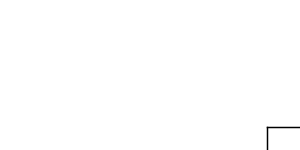

In [4]:
compare.plot_difference_2D(steps=range(10000, 50000, 100), truth=p_inf, domain=[[-2., -2.], [2., 2.]],\
                           mc_domain=[[-3., -3.], [3., 3.]], net_path='../data/2D-true-vs-learned',\
                           net_name='sphere2D', num_pts=1000, num_mc_pts=int(1e5), num_nodes=50, num_blocks=3, dtype=tf.float32,\
                           name="sphere{}D".format(dim))




In [5]:
log = np.genfromtxt('../data/2D-true-vs-learned/train_log.csv', delimiter=',')

In [6]:
log

array([[0.00000000e+00, 1.36546660e+04, 3.54329181e+00],
       [1.00000000e+01, 1.66478760e+03, 3.83510876e+00],
       [2.00000000e+01, 3.19459560e+02, 4.09971809e+00],
       ...,
       [4.99700000e+04, 7.28141600e-03, 1.39389739e+03],
       [4.99800000e+04, 6.53919400e-03, 1.39421056e+03],
       [4.99900000e+04, 6.81814500e-03, 1.39447932e+03]])

<IPython.core.display.Javascript object>


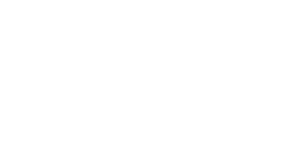

In [7]:
compare.plot_evolution(steps=range(100, 10000, 100), low=[-2., -2.], high=[2., 2.], resolution=30,\
                           truth=p_inf, mc_domain=[[-3., -3.], [3., 3.]], num_mc_pts=int(1e5),
                           fig_path='../data/2D-true-vs-learned/evolution2', net_path='../data/2D-true-vs-learned',\
                           net_name='sphere2D', num_nodes=50, num_blocks=3, dtype=tf.float32,\
                           name="sphere{}D".format(dim))

In [8]:
import matplotlib.pyplot as plt 
steps=range(100, 10000, 100)
log = np.genfromtxt('../data/2D-true-vs-learned/train_log.csv', delimiter=',')
loss, k = [], 0
for row in log:
    if int(row[0]) == steps[k]:
        loss.append(row[1])
        k += 1
    if k == len(steps):
        break
print(len(loss))
diff = np.genfromtxt('../data/2D-true-vs-learned/difference.csv', delimiter=',')
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# j = int(len(loss)/2)
# ax.plot(loss[j:], diff[j:])
# plt.show()

99
